# Prediction of Breast Cancer Using Machine Learning Algorithm 

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
data= pd.read_excel("/Users/sahayajefrin/Library/Containers/com.microsoft.Excel/Data/Desktop/Breast Cancer dataset.xlsx")

## Explorative Data Analysis

In [3]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
data.tail(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The categorical variables of diagonosis which is the response variable is stored as an object it confirms that is on categorical variable.

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no missing values thus data imputation is not required.

# Data Visualization

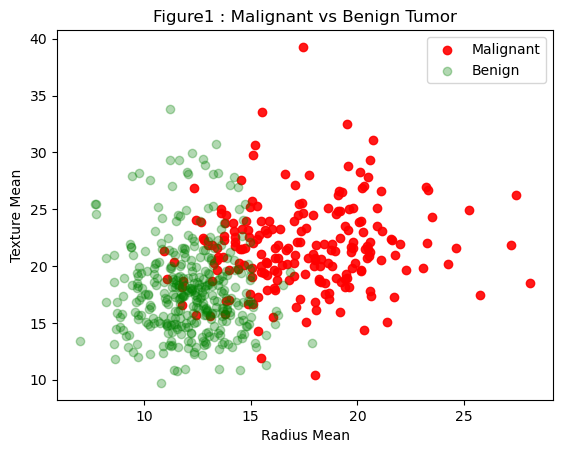

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
plt.title("Figure1 : Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.9)
plt.scatter(B.radius_mean, B.texture_mean, color = "green", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [9]:
data= data.drop('id', axis=1)

In [10]:
data.replace(('M', 'B'), (0,1), inplace=True)

In [11]:
# Correlations
corr_matrix = data.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


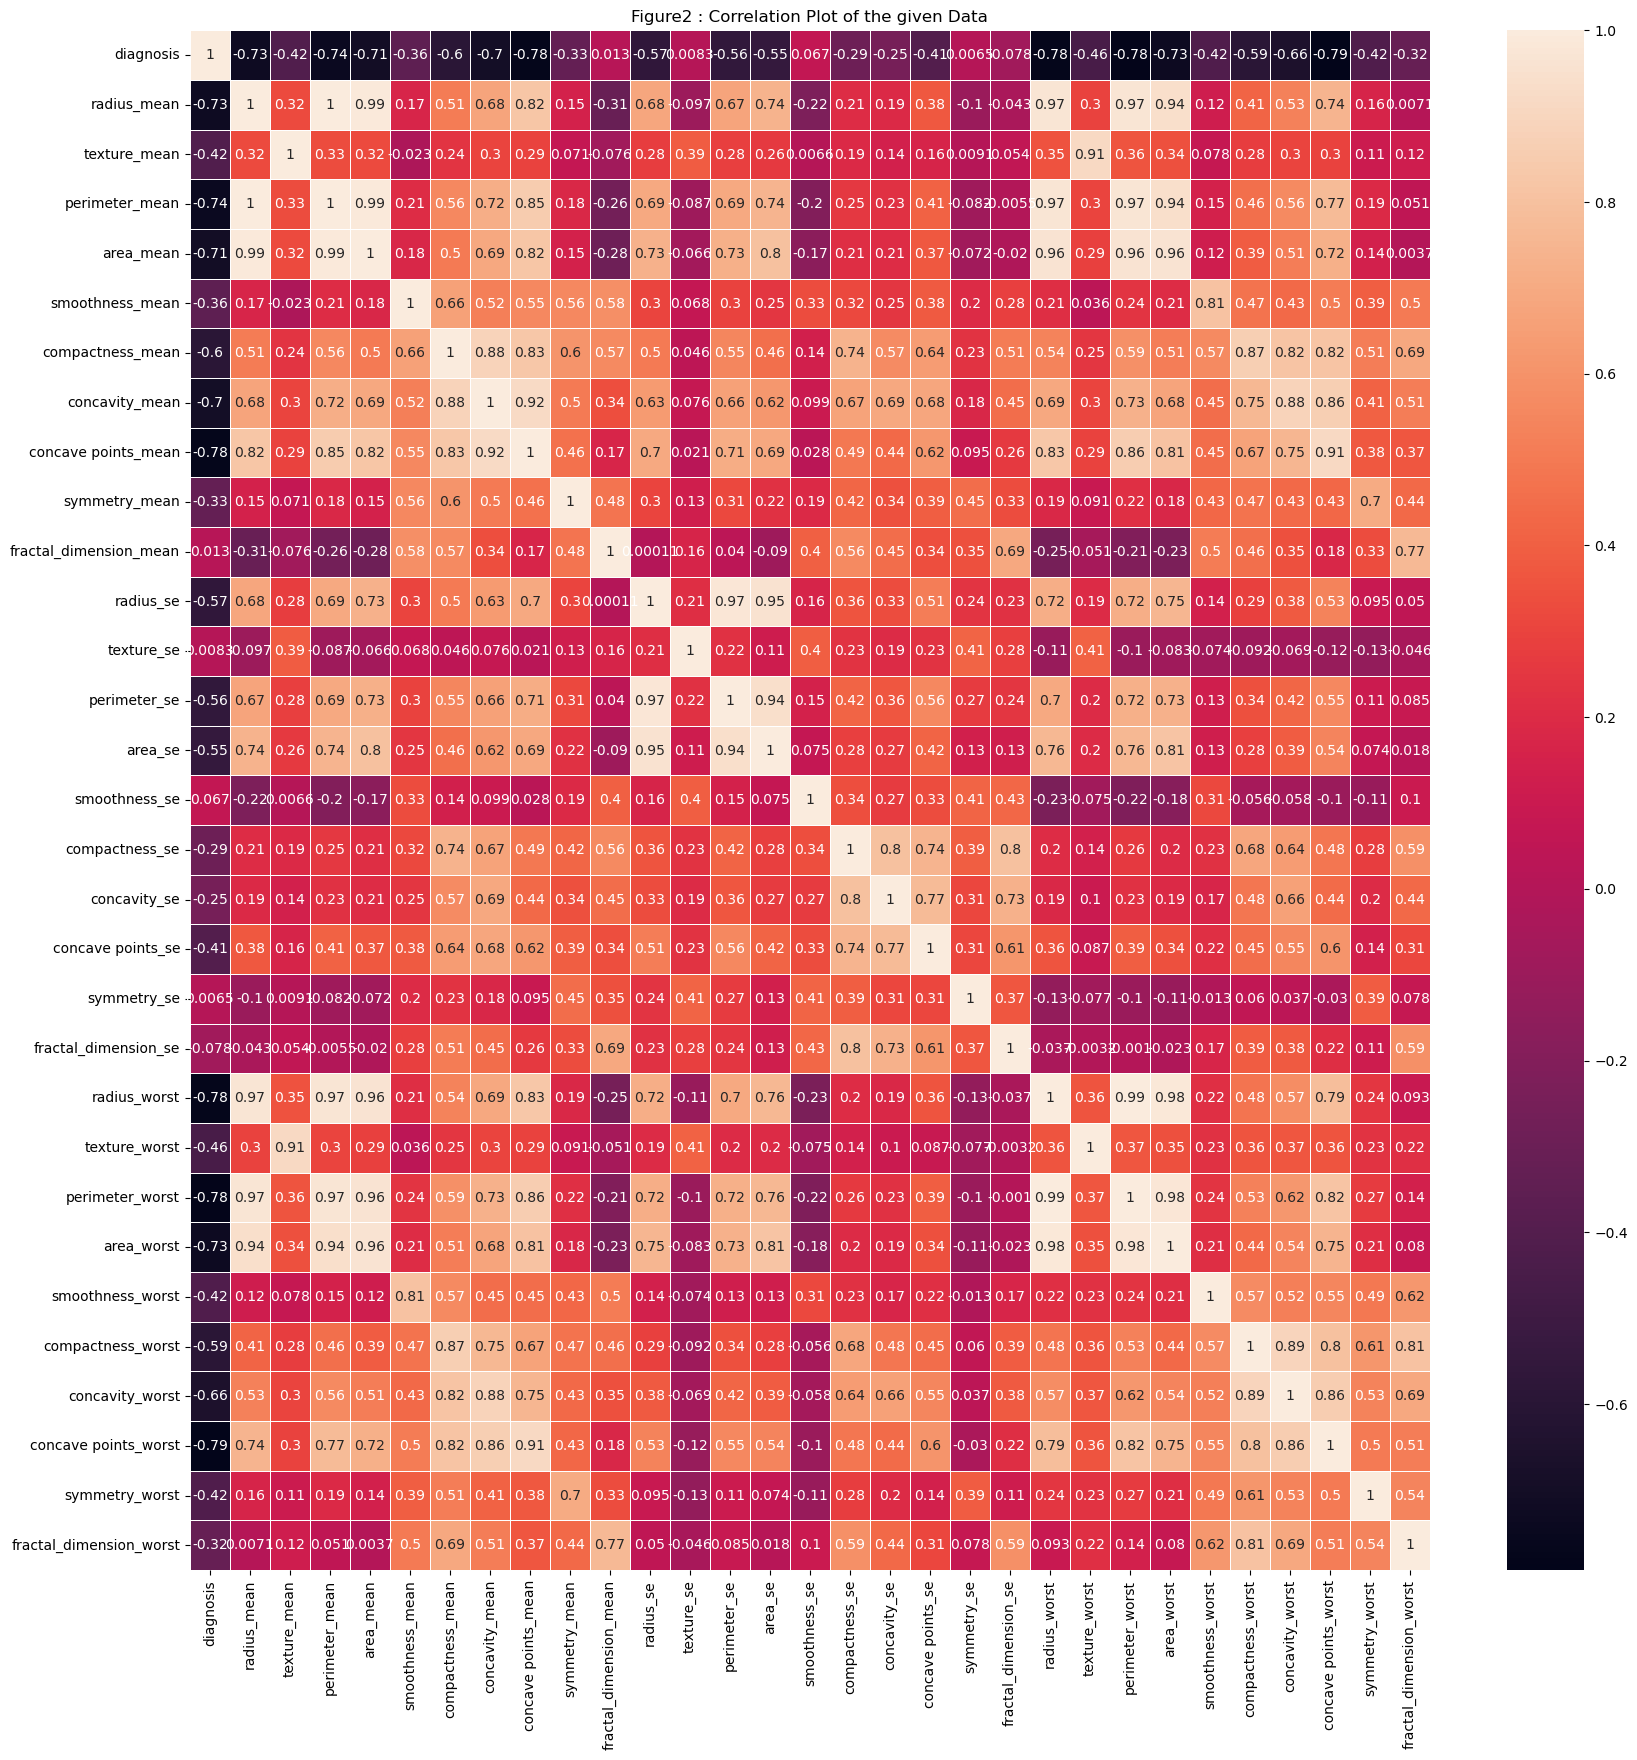

In [12]:
plt.figure(figsize=(20, 20))
plt.title("Figure2 : Correlation Plot of the given Data")
sns.heatmap(corr_matrix,annot=True,linewidth=.5)
plt.show()

In [13]:
# threshold to explore highly correlated features
import numpy as np
threshold = 0.75
filter_ = np.abs(corr_matrix['diagnosis']) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
corr_features

['diagnosis',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst']

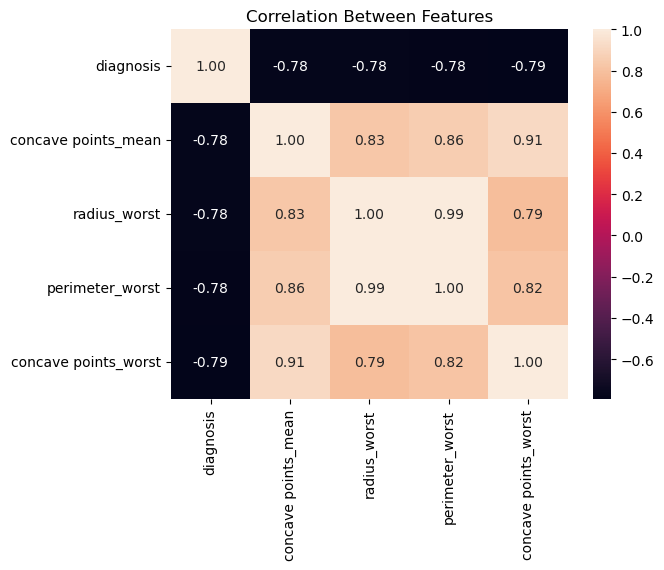

In [14]:
# visualize which features are highly correlated
sns.heatmap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between features")
plt.show()

B = benign: 357
M = Malignant: 212


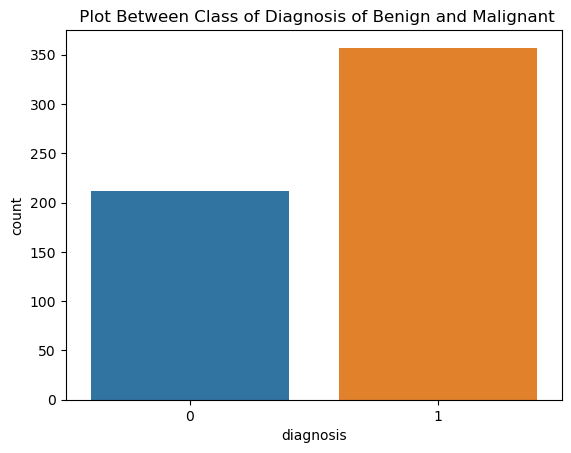

In [15]:
sns.countplot(data['diagnosis'],)
B,M = data['diagnosis'].value_counts()
print('B = benign:',B)
print('M = Malignant:',M)
plt.title(" Plot Between Class of Diagnosis of Benign and Malignant")
plt.show()

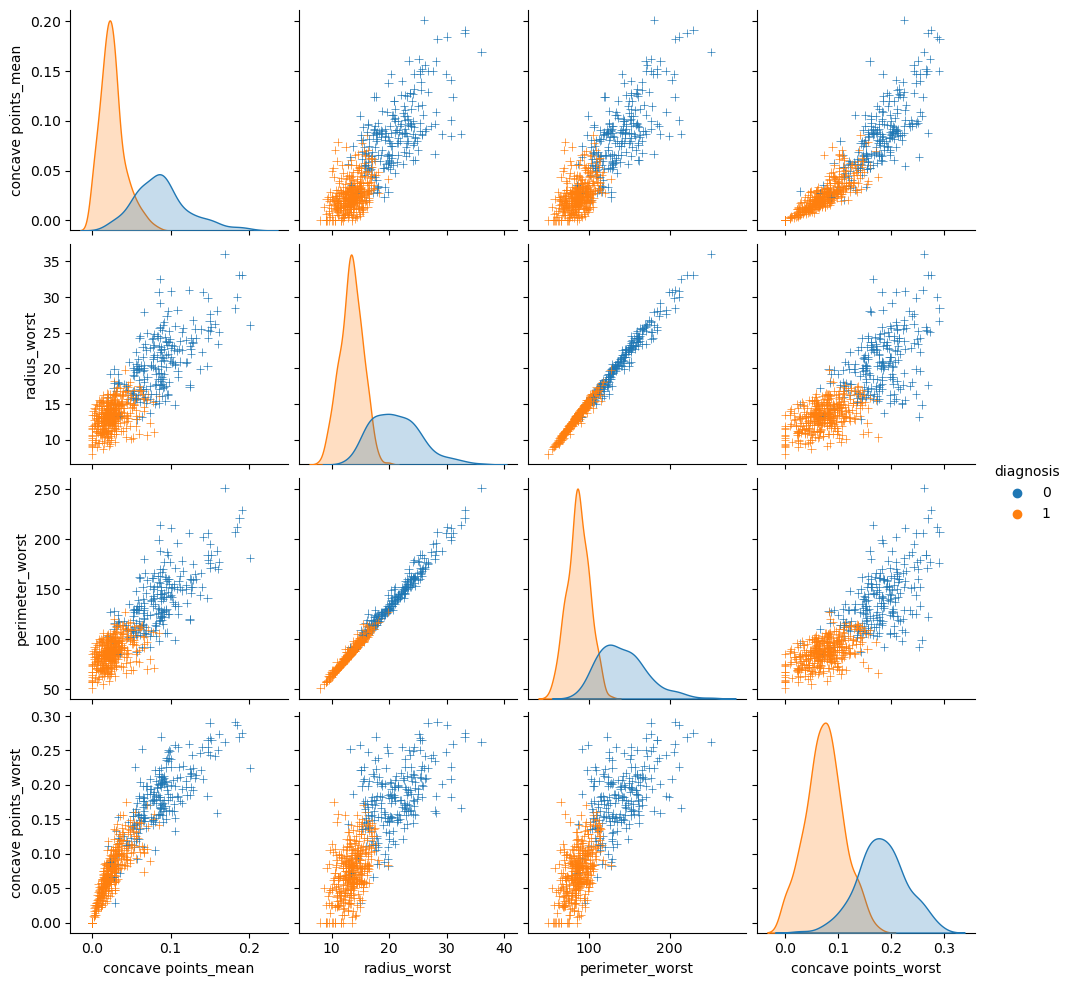

In [16]:
# decreasing threshold to see if the distributions have skewness
threshold = 0.75
filter_ = np.abs(corr_matrix['diagnosis']) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
sns.pairplot(data[corr_features], diag_kind = 'kde', markers = "+", hue = 'diagnosis')
plt.show()

In [17]:
data['diagnosis'].value_counts().to_frame()

,diagnosis
1,357
0,212


In [18]:
d2 =len(data[data['diagnosis']==1])
d3 =len(data[data['diagnosis']==0])
pd2 = d2/(d2+d3)
print("Percentage of Benign diagnosis patients is", pd2*100)
pd3 = d3/(d2+d3)
print("Percentage of Malignant diagnosis patients is", pd3*100)

Percentage of Benign diagnosis patients is 62.741652021089635
Percentage of Malignant diagnosis patients is 37.258347978910365


# Analysis


In [19]:
X = data.drop('diagnosis', axis=1)
y = data["diagnosis"]

# Splitting Data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (455, 30)
Number transactions y_train dataset:  (455,)
Number transactions X_test dataset:  (114, 30)
Number transactions y_test dataset:  (114,)


#  SMOTE

In [21]:
print("Before OverSampling, counts of label 'B': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label 'M': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'B': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label 'M': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label 'B': 285
Before OverSampling, counts of label 'M': 170 

After OverSampling, the shape of train_X: (570, 30)
After OverSampling, the shape of train_y: (570,) 

After OverSampling, counts of label 'B': 285
After OverSampling, counts of label 'M': 285


# Standard Scaler
A standard Scaler is a statistical technique that is used to standardize the scale of data. Standard Scaler transforms the data so that it has a mean of 0 and a standard deviation of 1. This transformation is often used before applying machine learning algorithms to the data.

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X_train_res,y_train_res,test_size=0.2,random_state=1)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Principal Component Analysis

In [23]:
from sklearn.decomposition import PCA
pca=PCA(.95)
pca.fit(X_train)
PCA(n_components=0.95)
pca.n_components_

10

# Model Building 
## 1 Logistic Regression

In [24]:
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
clf=model1.fit(X_train,y_train)
y_predl=model1.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
print(accuracy_score(y_test,y_predl))


0.9824561403508771


In [85]:
print(classification_report(y_test, y_predl))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        64

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [86]:
confusion_matrix = confusion_matrix (y_test, y_predl)
print(confusion_matrix)

[[49  1]
 [ 1 63]]


## Implementing Logistic Regression with KFold Cross Validation

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
cv=KFold(n_splits=30,random_state=1,shuffle=True)
scores=cross_val_score(model1,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(scores)
print('Accuracy:%.3f(%3f)'%(mean(scores),std(scores)))

[1.         1.         0.9375     0.875      0.9375     1.
 1.         1.         1.         0.93333333 1.         0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 1.
 0.93333333 1.         1.         1.         1.         1.
 1.         1.         1.         0.93333333 1.         0.93333333]
Accuracy:0.969(0.036457)


# 2.Linear Discriminant Analysis

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

In [31]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [32]:
y_predict=lda.predict(X_test)

In [33]:
accuracy_score(y_test,y_predict)

0.9736842105263158

In [34]:
from sklearn.metrics import confusion_matrix , classification_report,multilabel_confusion_matrix

confusion_matrix(y_test,y_predict)

array([[48,  2],
       [ 1, 63]])

In [35]:
multilabel_confusion_matrix(y_test,y_predict)#Taking each class positive

array([[[63,  1],
        [ 2, 48]],

       [[48,  2],
        [ 1, 63]]])

## Implementing  Linear Discriminant Analysis with KFold Cross Validation

In [36]:
cv=KFold(n_splits=30,random_state=1,shuffle=True)
scores=cross_val_score(lda,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(scores)
print('Accuracy:%.3f(%3f)'%(mean(scores),std(scores)))

[1.         0.9375     0.9375     1.         0.9375     0.9375
 0.93333333 1.         1.         0.86666667 1.         1.
 0.86666667 1.         0.93333333 0.93333333 0.93333333 1.
 0.93333333 1.         1.         1.         0.93333333 1.
 1.         1.         1.         1.         0.93333333 0.93333333]
Accuracy:0.965(0.040819)


# 3. QuadraticDiscriminantAnalysis

In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()

In [38]:
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [39]:
y_predicts=qda.predict(X_test)

In [40]:
accuracy_score(y_test,y_predicts)

0.9473684210526315

In [41]:
confusion_matrix(y_test,y_predicts)

array([[48,  2],
       [ 4, 60]])

In [42]:
multilabel_confusion_matrix(y_test,y_predicts)#Taking each class positive

array([[[60,  4],
        [ 2, 48]],

       [[48,  2],
        [ 4, 60]]])

# Implementing  Quadratic Discriminant Analysis with KFold Cross Validation

In [43]:
cv=KFold(n_splits=30,random_state=1,shuffle=True)
scores=cross_val_score(qda,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(scores)
print('Accuracy:%.3f(%3f)'%(mean(scores),std(scores)))

[1.         1.         0.9375     0.9375     0.9375     1.
 1.         0.93333333 1.         0.93333333 0.93333333 1.
 0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 1.         1.         1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.         0.93333333 0.93333333]
Accuracy:0.965(0.032891)


## 4.  K Nearest Neighbors Classifier Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_predk = classifier.predict(X_test)
y_predk

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1])

In [46]:
ac = accuracy_score(y_test, y_predk)
print(ac)

0.9912280701754386


In [47]:
print(classification_report(y_test, y_predk))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        64

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## K Neighbors Classification using KFold Cross Validation

In [48]:
k_range=range(1,30)
k_scores=[]
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv=KFold(n_splits=10,random_state=1,shuffle=True)

In [49]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,scoring='accuracy',cv=cv,n_jobs=1)
    k_scores.append(scores.mean())

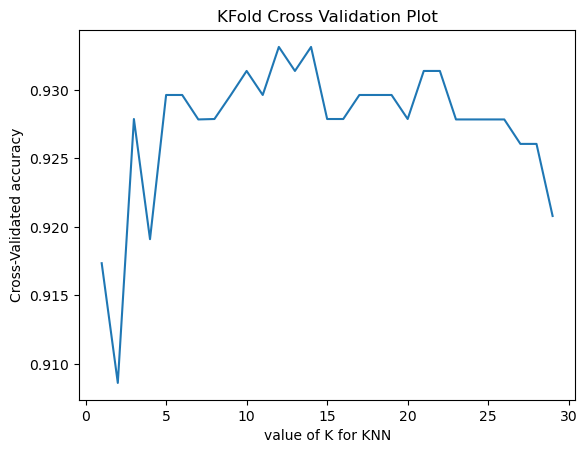

In [50]:
plt.plot(k_range,k_scores)
plt.xlabel("value of K for KNN")
plt.ylabel("Cross-Validated accuracy")
plt.title("KFold Cross Validation Plot")
plt.show()

In [51]:
cv=KFold(n_splits=30,random_state=1,shuffle=True)
scores=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(scores)
print('Accuracy:%.3f(%3f)'%(mean(scores),std(scores)))

[1.         1.         0.875      0.875      0.9375     1.
 0.86666667 1.         1.         0.86666667 0.86666667 1.
 0.86666667 1.         0.93333333 0.93333333 0.93333333 0.93333333
 1.         1.         1.         1.         0.93333333 1.
 1.         1.         1.         1.         1.         0.93333333]
Accuracy:0.958(0.052025)


## 5. Gaussian Naive Bayes model 
Gaussian Naive Bayes is a strong assumption because it assumes that the features are independent of each other. 
Gaussian Naive Bayes requires a training dataset in order to make predictions. This training dataset is used to fit a Gaussian distribution to each of the features. When a new data point is encountered, the algorithm uses the Gaussian distributions to predict the probability that the data point belongs to each class. The class with the highest probability is then predicted.

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [53]:
y_predg = gnb.predict(X_test)

In [54]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_predg))
print(classification_report(y_test, y_predg))

Gaussian Naive Bayes model accuracy(in %): 0.868421052631579
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        50
           1       0.90      0.86      0.88        64

    accuracy                           0.87       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.87      0.87      0.87       114



# Gaussian Naive Bayes model using KFold Cross Validation¶

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10,random_state=1,shuffle=True)


scores=cross_val_score(gnb,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(scores)
print('Accuracy:%.3f(%3f)'%(mean(scores),std(scores)))

[0.93478261 0.93478261 0.95652174 0.95652174 0.95652174 0.91304348
 0.95555556 0.93333333 0.95555556 0.91111111]
Accuracy:0.941(0.017196)


# 6. Support vector Machine

In [56]:
clf = svm.SVC(kernel='linear',random_state=0) # Linear Kernel

In [57]:
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [58]:
y_preds = clf.predict(X_test)

In [59]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_preds))

Accuracy: 0.9824561403508771


In [60]:
# Confusiuon Matrix
print("Confusiuon Matrix:",metrics.confusion_matrix(y_test, y_preds))

Confusiuon Matrix: [[49  1]
 [ 1 63]]


#  Support vector Machine using KFold Cross Validation

In [61]:
scores=cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(scores)
print('Accuracy:%.3f(%3f)'%(mean(scores),std(scores)))

[0.97826087 0.93478261 1.         0.95652174 0.97826087 0.95652174
 0.97777778 1.         1.         0.95555556]
Accuracy:0.974(0.021371)


# 7. Decision Tree

In [62]:
from sklearn import tree
dec = tree.DecisionTreeClassifier()
clfd = dec.fit(X_train, y_train)
clfd

DecisionTreeClassifier()

[Ellipsis]

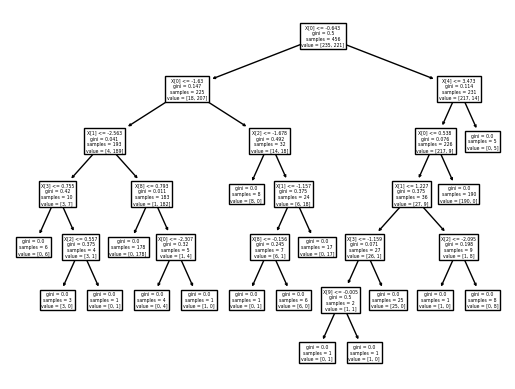

In [63]:
tree.plot_tree(clfd)
[...]

In [64]:
y_predd = clfd.predict(X_test)

In [65]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_predd))

Accuracy: 0.9210526315789473


In [91]:
# Confusiuon Matrix
print("Confusiuon Matrix:",metrics.confusion_matrix(y_test, y_predd))

Confusiuon Matrix: [[47  3]
 [ 6 58]]


In [92]:
print(classification_report(y_test, y_predd))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        50
           1       0.95      0.91      0.93        64

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



# Decision Tree using KFold Cross Validation

In [67]:
scores=cross_val_score(clfd,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(scores)
print('Accuracy:%.3f(%3f)'%(mean(scores),std(scores)))

[0.95652174 0.95652174 0.91304348 1.         0.89130435 0.93478261
 0.88888889 0.93333333 0.97777778 0.95555556]
Accuracy:0.941(0.034046)
